# MIS780 Advanced AI For Business - Assignment 2 - T2 2024

## Task Number: Waste image Classification

**Student Name:** _Jeremiyah Mathew Peter_

**Student ID:** _222632529_

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)

<a id = "cell_Summary"></a>
## 1. Executive Summary

In finding the best model for real world applications, **CNN 4**(3 convolusional layers(32,64,128), dense layer(256),3 max pooling) was selected for a comparatively good kappa value (0.555), comparatively good testing score (0.6279) and almost similar testing and training accuracy rates (0.7305). CNN 3 has the best kappa value and testing accuracy score but the difference between training and testing accuracy rates are higher which indicates overfitting. As our aim is to develop model for real world waste classification scenarios, we choose CNN4.

Cardboard is the worst class with 0.41 F1 score. It might be due to various factors such as inherent similarities between cardboard and other materials.

We can improve the model further by Using SMOTE Upsampling to handle class imbalance, Data augmentation for preprocessing, maintaining consistency in image resolutions, hyper parameter tuning techniques.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from google.colab import drive
#it will open a webpage for verifying your google account. if it is successful, the Google colab can link the Google drive
drive.mount('/content/drive')

# to show the folders under the dataset
!ls "/content/drive/My Drive/Part2_WasteImages"

Mounted at /content/drive
Cardboard  Glass  Metal  Paper	Plastic  Vegetation


In [ ]:
import os

# Set the paths to the folders containing the image files
Glass_path = '/content/drive/MyDrive/Part2_WasteImages/Glass'
Metal_path = '/content/drive/MyDrive/Part2_WasteImages/Metal'
Paper_path = '/content/drive/MyDrive/Part2_WasteImages/Paper'
Plastic_path = '/content/drive/MyDrive/Part2_WasteImages/Plastic'
Cardboard_path = '/content/drive/MyDrive/Part2_WasteImages/Cardboard'
Vegetation_path = '/content/drive/MyDrive/Part2_WasteImages/Vegetation'

# get a list of all files in the folder
Glass_file_list = os.listdir(Glass_path)
Metal_file_list = os.listdir(Metal_path)
Paper_file_list = os.listdir(Paper_path)
Plastic_file_list = os.listdir(Plastic_path)
Cardboard_file_list = os.listdir(Cardboard_path)
Vegetation_file_list = os.listdir(Vegetation_path)

# print the total number of files
print(f'Total number of files under Glass folder are: {len(Glass_file_list)}')
print(f'Total number of files under Metal folder are: {len(Metal_file_list)}')
print(f'Total number of files under Paper folder are: {len(Paper_file_list)}')
print(f'Total number of files under Plastic folder are: {len(Plastic_file_list)}')
print(f'Total number of files under cardboard folder are: {len(Cardboard_file_list)}')
print(f'Total number of files under Vegetation folder are: {len(Vegetation_file_list)}')


Total number of files under Glass folder are: 420
Total number of files under Metal folder are: 547
Total number of files under Paper folder are: 500
Total number of files under Plastic folder are: 500
Total number of files under cardboard folder are: 461
Total number of files under Vegetation folder are: 436


In [ ]:
import os
import tensorflow as tf

# Data parameters
img_rows, img_cols = 50, 50
channels = 3
num_classes = 6

# Define paths for each category
folder_paths = {
    'Glass': Glass_path,
    'Metal': Metal_path,
    'Paper': Paper_path,
    'Plastic': Plastic_path,
    'Cardboard': Cardboard_path,
    'Vegetation': Vegetation_path
}

# Create a list to store the image data and labels
data = []

# Iterate through each folder and its label
for label, folder_path in folder_paths.items():
    # Iterate through the files in the folder
    for file in os.listdir(folder_path):
        # Check if the file is a jpeg or jpg file
        if file.endswith('.jpeg') or file.endswith('.jpg'):
            try:
                # Load the image data from the file using TensorFlow
                img = tf.io.read_file(os.path.join(folder_path, file))
                img = tf.image.decode_jpeg(img, channels=channels)
                img = tf.image.resize(img, (img_rows, img_cols))
                # Add the image data and label to the data list
                data.append((img, label))
            except Exception as e:
                print(f"Error processing file {file}: {e}")

# Now `data` contains all the images and their corresponding labels.


The data is shuffled and split into a training set and a test set using list slicing. The training set consists of the first 70% of the data, and the test set consists of the remaining 30%.

In [ ]:
import random

# Shuffle the data
random.shuffle(data)

# Split into train/test sets
split_index = int(len(data) * 0.7)
train_data, test_data = data[:split_index], data[split_index:]

In [ ]:
# Extract the image data and labels from the training data
X_train, Y_train = zip(*train_data)

# Extract the image data and labels from the testing data
X_test, Y_test = zip(*test_data)

# Convert the image data and labels into NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
X_train /= 248
X_test /= 248

# print the shape of the reshaped data
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (2004, 50, 50, 3)
Testing matrix shape (860, 50, 50, 3)


In [ ]:
import numpy as np

# Assuming Y_train and Y_test contain the labels (categories)
# Example:
# Y_train = ['Glass', 'Metal', 'Paper', ...]
# Y_test = ['Plastic', 'Cardboard', 'Vegetation', ...]

# Print the original format of the first element in the training dataset
print('The original format of the class of the first element in the training dataset is:', Y_train[0], '\n')

# Create a NumPy array with category strings (if needed)
categories = np.array(['Glass', 'Metal', 'Paper', 'Plastic', 'Cardboard', 'Vegetation'])

# Create a mapping from category strings to integers
category_map = {'Glass': 0, 'Metal': 1, 'Paper': 2, 'Plastic': 3, 'Cardboard': 4, 'Vegetation': 5}

# Encode the categories
Y_train_encoded = np.array([category_map[category] for category in Y_train])
Y_test_encoded = np.array([category_map[category] for category in Y_test])

# Print the encoded format of the first element in the training dataset
print('The unique integer mapping encoding format of the class of the first element in the training dataset is:', Y_train_encoded[0])

The original format of the class of the first element in the training dataset is: Metal 

The unique integer mapping encoding format of the class of the first element in the training dataset is: 1


We plot some color images from the training data.

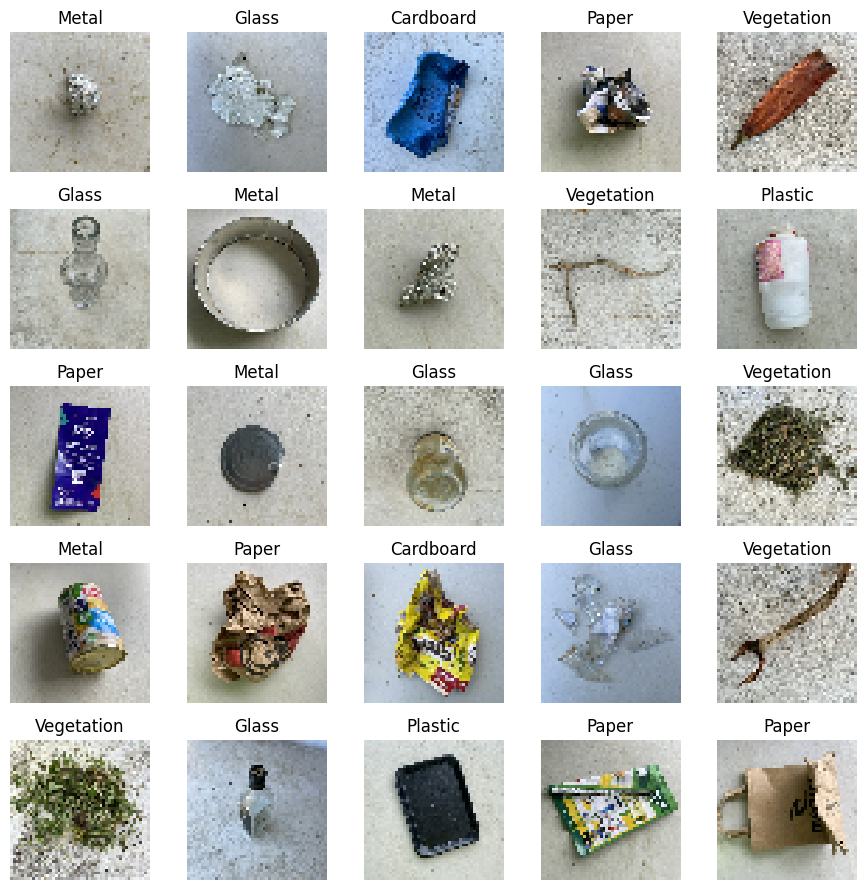

In [ ]:
import matplotlib.pyplot as plt

# Change the default figure size for all plots created in the program
plt.rcParams['figure.figsize'] = (9, 9)

# Labels for the classes
labels = ['Glass', 'Metal', 'Paper', 'Plastic', 'Cardboard', 'Vegetation']

# Plot the first 25 images in the training set
for i in range(25):
    # Create a subplot with 5 rows and 5 columns
    plt.subplot(5, 5, i + 1)
    # Display the image at index i in the X_train array
    plt.imshow(X_train[i], interpolation='none')
    # Set the title for the subplot using the corresponding label
    plt.title("{}".format(labels[int(Y_train_encoded[i])]))
    # Remove axis ticks for better visibility
    plt.axis('off')

# Adjust the layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()

<a id = "cell_model"></a>
## 3. Predictive Modeling

Apply the CNN model to classify the photos and evaluate the model.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, Callback, EarlyStopping
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Nadam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop


In [ ]:
# Keras callbacks (when Tensorboard installed)
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose=0)]

**Execution**

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming Y_train is also an array of string labels
# Convert string labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)


In [ ]:
#CNN model with two Convolution layers, one Pooling layer with max pooling,
#which are stacked on top of a traditional ANN model (with the same architecture as the model 1)
def model_4():
    model = Sequential()

    # First convolutional block: Conv2D + MaxPooling
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional block
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output before feeding into Dense layers
    model.add(Flatten())

    # Fully connected layer with 256 units
    model.add(Dense(256, activation='relu'))

    # Dropout to reduce overfitting
    model.add(Dropout(0.5))

    # Output layer with softmax activation for multi-class classification
    model.add(Dense(6, activation='softmax'))

    # Model summary
    model.summary()

    return model

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot the training history
def plot_hist(history_df):
    # Plot the accuracy
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history_df['accuracy'], label='Training Accuracy')
    plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history_df['loss'], label='Training Loss')
    plt.plot(history_df['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 619,334 (2.36 MB)

 Trainable params: 619,334 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 - 5s - 319ms/step - accuracy: 0.2206 - loss: 1.7641 - val_accuracy: 0.2477 - val_loss: 1.7380
Epoch 2/100
16/16 - 2s - 95ms/step - accuracy: 0.3094 - loss: 1.7207 - val_accuracy: 0.3744 - val_loss: 1.5976
Epoch 3/100
16/16 - 0s - 17ms/step - accuracy: 0.3882 - loss: 1.5979 - val_accuracy: 0.4558 - val_loss: 1.4262
Epoch 4/100
16/16 - 0s - 13ms/step - accuracy: 0.4286 - loss: 1.4740 - val_accuracy: 0.4709 - val_loss: 1.4213
Epoch 5/100
16/16 - 0s - 20ms/step - accuracy: 0.4531 - loss: 1.3931 - val_accuracy: 0.4279 - val_loss: 1.5151
Epoch 6/100
16/16 - 0s - 13ms/step - accuracy: 0.4870 - loss: 1.3217 - val_accuracy: 0.4256 - val_loss: 1.4515
Epoch 7/100
16/16 - 0s - 18ms/step - accuracy: 0.4880 - loss: 1.3139 - val_accuracy: 0.5093 - val_loss: 1.3276
Epoch 8/100
16/16 - 0s - 21ms/step - accuracy: 0.5095 - loss: 1.2482 - val_accuracy: 0.5884 - val_loss: 1.1537
Epoch 9/100
16/16 - 0s - 16ms/step - accuracy: 0.5853 - loss: 1.1043 - val_accuracy: 0.5151 - val_loss: 1.2976


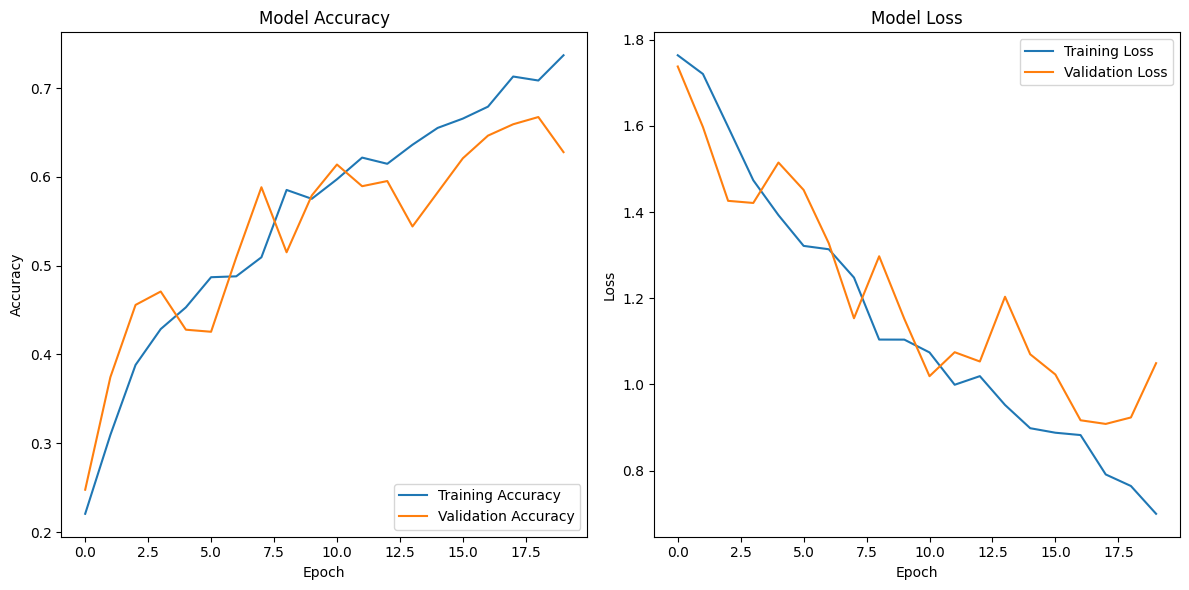

In [ ]:
model = model_4()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001, weight_decay=1e-6),
              metrics=['accuracy'])

# Train the model
hist = model.fit(X_train, Y_train,
                 batch_size=128,
                 epochs=100,
                 verbose=2,
                 validation_data=(X_test, Y_test),
                 validation_split=0.2,
                 callbacks=keras_callbacks)

# Convert the history.history dictionary to a DataFrame
history_df = pd.DataFrame(hist.history)

# Plot the training history
plot_hist(history_df)

In [ ]:
# Evaluate on training data
train_score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.7426
Train accuracy: 0.7305 

Test loss: 1.0495
Test accuracy: 0.6279


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous = np.round(y_pred)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred, axis=1)
y_test_multiclass = Y_test

# Calculate the kappa score
kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(y_test_multiclass, y_pred_multiclass, target_names= labels)

# Print the report
print("The result of the classification report is: \n ",report)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
The result of Kappa is : 0.555
The result of the classification report is: 
                precision    recall  f1-score   support

       Glass       0.54      0.69      0.60       150
       Metal       0.52      0.89      0.66       117
       Paper       0.56      0.78      0.66       146
     Plastic       0.75      0.52      0.61       154
   Cardboard       0.69      0.29      0.41       159
  Vegetation       1.00      0.69      0.82       134

    accuracy                           0.63       860
   macro avg       0.68      0.64      0.63       860
weighted avg       0.68      0.63      0.62       860



In [ ]:
y_pred

array([[1.85412727e-02, 2.15985090e-01, 3.32037121e-01, 4.92861345e-02,
        3.77444595e-01, 6.70573721e-03],
       [7.75855720e-01, 2.52605975e-02, 2.38082781e-02, 1.07040919e-01,
        1.78450122e-02, 5.01894541e-02],
       [3.61934125e-01, 1.42299995e-01, 2.79036686e-02, 3.50481421e-01,
        1.17307805e-01, 7.29652311e-05],
       ...,
       [5.71686588e-02, 2.60116495e-02, 7.21011877e-01, 3.97915393e-02,
        1.55539393e-01, 4.76950052e-04],
       [1.32347969e-02, 3.61168444e-01, 5.55904984e-01, 3.75544094e-03,
        6.51125014e-02, 8.23839742e-04],
       [6.42511025e-02, 9.31531906e-01, 1.13890436e-03, 1.97366159e-03,
        8.80172302e-04, 2.24278425e-04]], dtype=float32)

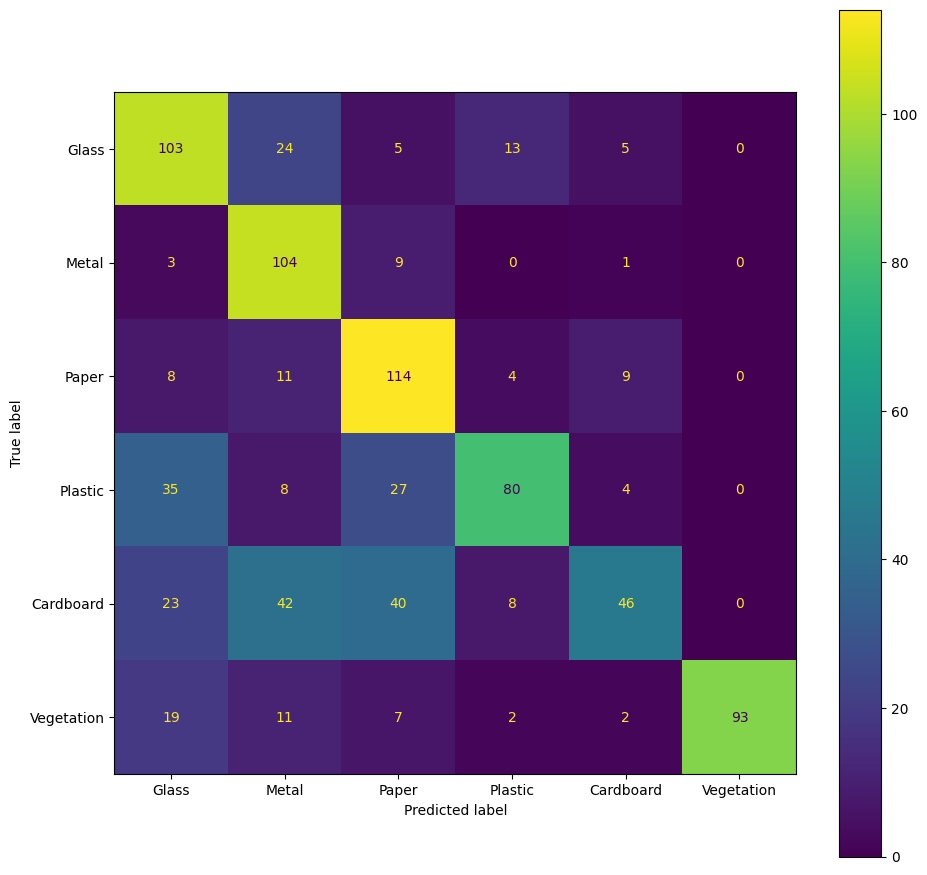

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(
    y_test_multiclass,
    y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels)

# Create a figure with a larger size
fig = plt.figure(figsize=(11, 11))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


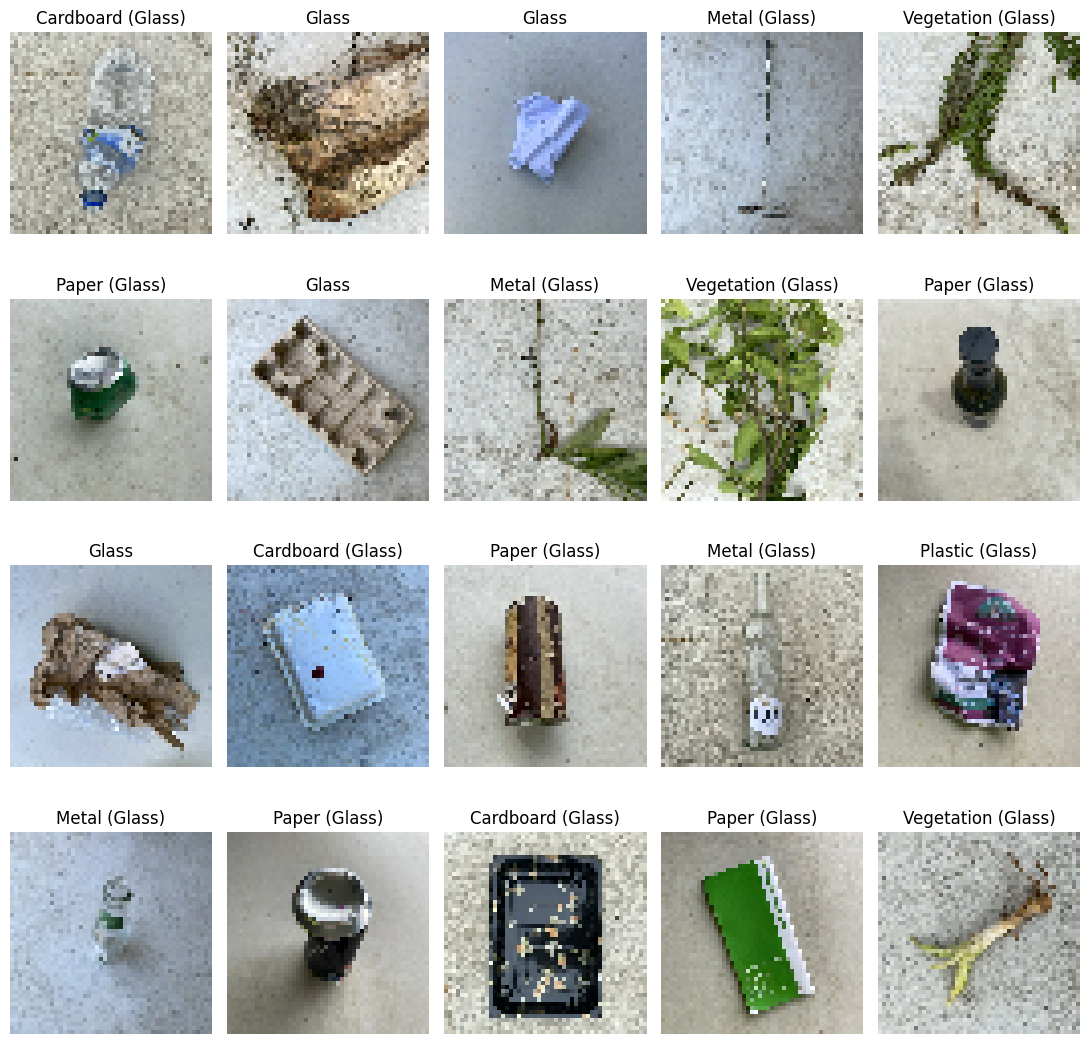

In [ ]:
import matplotlib.pyplot as plt # import the matplotlib library

def plot_images(images, cols=5, figsize=(15, 15), titles=None): # define the plot_images() function
    """Display a list of images in a grid."""
    rows = len(images) // cols + (1 if len(images) % cols else 0)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, image in enumerate(images):
        ax = axes.flat[i] if rows > 1 else axes[i]
        ax.imshow(image)
        ax.axis('off')
        if titles:
            ax.set_title(titles[i])
    plt.tight_layout()
    plt.show()

from re import X
img_range = range(20)
imgs = X_test[img_range]
true_labels = [labels[np.argmax(x)] for x in Y_test[img_range]]
predictions = model.predict(imgs.reshape(len(img_range), img_rows, img_cols, channels))
pred_labels = [labels[np.argmax(x)] for x in predictions]
titles = [pred_labels[x]+('' if true_labels[x] == pred_labels[x] else ' ('+true_labels[x]+')') for x in img_range]
plot_images(imgs, cols=5, figsize=(11,11), titles=titles) # call the defined plot_images() function

<a id = "cell_report"></a>
## 4. Experiments Report

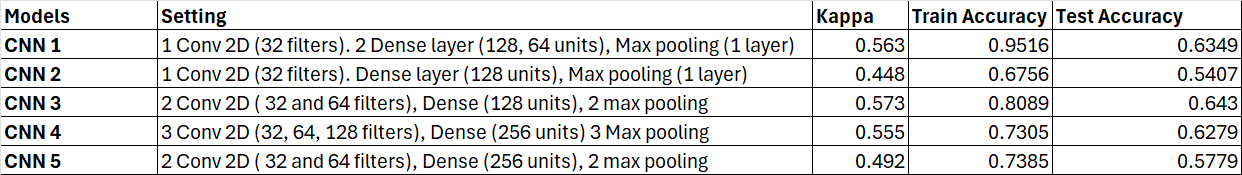

**Best Model**

CNN 4 is the best model as it has the good Kappa value and almost similar training and testing accuracy rate of all. The worst performing class is cardboard with an F1 score of 0.41. The model CNN 1 was not good for the model because of its deeper architecture, it led to over-fitting. The worst performing model was CNN 2,with kappa score of 0.448 and lowest testing and training accuracy.  CNN 3 is actually the best model with highest accuracy rate of 0.643 and highest kappa value of 0.573. However, the difference between training and testing accuracy shows that there's high probability of over-fitting when applied to real-world scenarios. As our aim is to develop best model for real-world applications, we choose CNN 4 which has similar training and testing accuracy rates.

**Reasons for worst class performance**

CNN 4 model has trouble classifying cardboard. It might be due to:

The inherent similarities of carboard with other materials like paper.

Lesser number of cardboard samples in the data leading to imbalanced dataset.

indistinguishable features between cardboard and other materials.

**How to improve the model for real-world applications**

Data collection:

Class imbalance handling: When certain types of wastes are more frequent than others, theres chance for class imbalance. Use techniques like SMOTE sampling to balance the dataset.

Data Processing:

Data Augmentation: Performing techniques like rotation, flipping, brightness/contrast adjusting, noise addition would increase the size of the dataset which inturn help the model to be robust in different environments.

Data Formatting:

Consistency in image sizes and image quality: Resizing images to a standard resolution would help avoid variability in quality and resolution whic can confuse the model.

Model architecture:

More different architecture (kernels, dense layers, convolutional layers) can be applied for the better performance.

Model optimisation:

Hyperparameter tuning: Applying grid search for optimising parameters such as learning rates, drop-outs, number of epochs and filter sizes.


